## SEMINARSKA NALOGA

### PRIDOBITEV IN OBLIKOVANJE PODATKOV
 
Stolpci, ki opisujejo naše podatke so naslednji:  
* ZaporednaStevilkaKD,
* MesecStoritve,
* UraStoritve,
* DanVTednu,
* OrganizacijskaEnotaStoritve,
* Povratnik,
* OpisKD,
* PoglavjeKD,
* GospodarskiKriminal,
* OrganiziranKriminal,
* MladoletniskaKriminaliteta,
* Poskus,
* KriminalisticnaOznacba1,
* KriminalisticnaOznacba2,
* KriminalisticnaOznacba3,
* UporabljenoSredstvo1,
* UporabljenoSredstvo2,
* UporabljenoSredstvo3,
* UporabljenoSredstvo4,
* UpravnaEnota,
* OpisKraja,
* LetoZakljucnegaDokumenta,
* VrstaZakDokumenta,
* ZaporednaStevilkaOsebeVKD,
* VrstaOsebe,
* StarostniRazred,
* Spol,
* Drzavljanstvo,
* Poskodba,
* VplivAlkohola,
* VplivMamil,
* OrganiziranaZdruzba,
* Skoda

In [2]:
import pandas as pd
import glob
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

l = glob.glob('data/*.csv')
for i in range(len(l)):
    l[i] = l[i].split('\\')[-1].upper()

# slovar poti do .csv datotek 
csv_data = {data.split('\\')[1].split('.')[0].upper():data for data in glob.glob('data/*.csv')}

In [3]:
dataframes = {}
for key, value in csv_data.items():
    df = pd.read_csv(csv_data[key], sep=';', encoding='cp1250', skipinitialspace = True)
    dataframes[key.upper()] = df

for df1 in dataframes.values():
    df1.columns = ['MesecStoritve' if x == 'DatumStoritve' else x for x in df]

### ANALIZA PODATKOV GLEDE NA ČAS

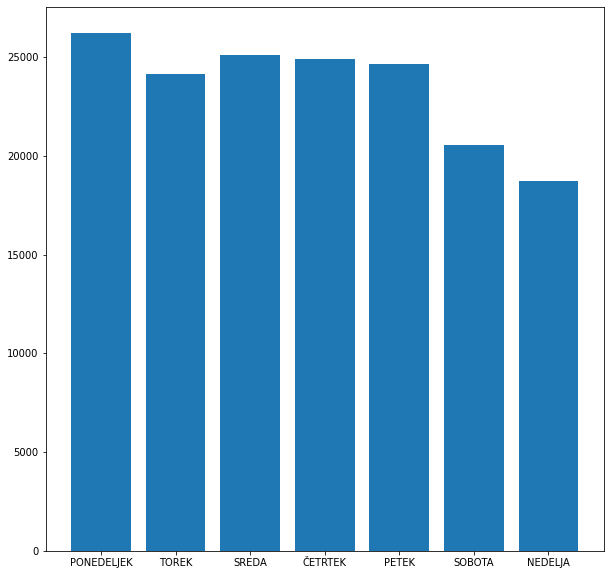

In [25]:
import matplotlib.pyplot as plt
from copy import copy
def convert_date(s) -> str:
    print(s)
    return s

time_dataframes = {k:v for k,v in dataframes.items()}

df1 = copy(time_dataframes['KD2009'])

df1['MesecStoritve'] = df1['MesecStoritve'].apply(lambda x: str(x)[:-4]+'.'+str(x)[-4:])
df1['MesecStoritve'] =  pd.to_datetime(df1['MesecStoritve'], format='%m.%Y')

dnevi = df1['DanVTednu'].value_counts()
x = ['PONEDELJEK', 'TOREK', 'SREDA', 'ČETRTEK', 'PETEK', 'SOBOTA', 'NEDELJA']
y = [dnevi.PONEDELJEK, dnevi.TOREK, dnevi.SREDA, dnevi.ČETRTEK, dnevi.PETEK, dnevi.SOBOTA, dnevi.NEDELJA]

plt.figure(figsize=(10,10))
plt.bar(x, y)
plt.show()